<a href="https://colab.research.google.com/github/godx2504/Air_Quality_Index/blob/main/AQI_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

**Dataset used from UCI Machine Learning Dataset**

In [19]:
# importing the data from csv file into pandas dataframe

air_quality_df = pd.read_csv('https://raw.githubusercontent.com/godx2504/Air_Quality_Index/main/AirQualityUCI.csv', sep=';',decimal=',')
#checking whether data is loaded or not
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [20]:
air_quality_df = air_quality_df.iloc[ : , :-2]
air_quality_df.head()
# The .iloc[] function in pandas is used for position-based indexing — it lets you select rows and columns by their integer positions (not by labels).
# we remove last two columns of dataframe bcz they do not contain any numerical values
# : --> all rows
# : -2 --> all columns except last 2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [21]:
air_quality_df.shape
air_quality_df.tail()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 9471 rows but all of them does not contain entries many have 'NaN'.
it was mentioned in our dataset description that file contains only 9358 instances.

In [22]:
air_quality_df.loc[[9356]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


9356 index(9357th row) represents last data point in our dataframe and remaining are just null values, this means dataset contain 9357 non empty rows

In [13]:
air_quality_df= air_quality_df.head(9357)
# this stores 9357 non-empty rows in dataframe
air_quality_df.tail()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
04/04/2005;10.00.00;3,1;1314;-200;13,5;1101;472;539;190;1374;1729;21,9;29,3;0,7568;;
04/04/2005;11.00.00;2,4;1163;-200;11,4;1027;353;604;179;1264;1269;24,3;23,7;0,7119;;
04/04/2005;12.00.00;2,4;1142;-200;12,4;1063;293;603;175;1241;1092;26,9;18,3;0,6406;;
04/04/2005;13.00.00;2,1;1003;-200;9,5;961;235;702;156;1041;770;28,3;13,5;0,5139;;
04/04/2005;14.00.00;2,2;1071;-200;11,9;1047;265;654;168;1129;816;28,5;13,1;0,5028;;


In [14]:
air_quality_df.shape

(9357, 1)

In [15]:
#getting info about dataset for null values method 1
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9357 entries, ('10/03/2004;18.00.00;2', '6;1360;150;11', '9;1046;166;1056;113;1692;1268;13', '6;48', '9;0') to ('04/04/2005;14.00.00;2', '2;1071;-200;11', '9;1047;265;654;168;1129;816;28', '5;13', '1;0')
Data columns (total 1 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                        --------------  ----- 
 0   Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;  6915 non-null   object
dtypes: object(1)
memory usage: 1.2+ MB


In [16]:
#checking the number of null values method 2
air_quality_df.isnull().sum()

,0
Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;,2442


In [ ]:
# counting the '-200' instances
air_quality_df.isin([-200]).sum(axis=0) #axis=0 as we are counting in how many rows -200 appears


This is the actual number of missing values. We directly cannot feed this data to our ML model, so we need to fill out the values.
***Handling of values*** is required. We have different methods to do that such as replacing by mean value,median value or interpolating. Here we simply use replacing by mean.

Now we calculate mean of each attributes and replace the null values with mean, but firstly we need to replace '-200' with NaN so that it does not varies mean

In [ ]:
air_quality_df = air_quality_df.replace(to_replace=-200, value= np.nan)
air_quality_df.isnull().sum()

In [ ]:
#finding mean of each attribute
air_quality_df.mean(numeric_only=True)
#numeric only excludes the first heading columns which contains string

In [ ]:
#filling NaN with mean values
air_quality_df.fillna(air_quality_df.mean(numeric_only=True) , inplace=True)
# inplace updates the orignal dataframe without need to assign back to new variable
# with place the code would look like: air_quality_df= air_quality_df.fillna(air_quality_df.mean(numeric_only=True))

air_quality_df.isnull().sum()
#all the null values have been replaced by the  mean of column


**Forecasting**- Done upon time series data, gives future prediction of trend over time



We have used forecasting in this project and we have used **FB Prophet Model**

Our model only intakes two columns as input ds and y, ds is date-time in format YYYY-MM-DD HH:MM:SS and y must be numeric column and represents the measurement we wish to forecast.

In [ ]:
#converting date from DD/MM/YYYY to YYYY-MM-DD using to_datetime of pd and saving it in variable date_info
date_info= pd.to_datetime(air_quality_df['Date'],format='%d/%m/%Y')
print(date_info)

In [ ]:
time_info = air_quality_df['Time']
# making a time only table and assigning it to the variable

print(time_info)
# problem is the timestamp is in HH.MM.SS it must be HH:MM:SS

In [ ]:
# conversion
time_info = time_info.str.replace('.', ':', regex=False)
print(time_info)


# .str is accessor that allows string function (here replace) to each element of series(here column)
# without setting regex=False, pandas (and Python) assumes that . is a regular expression (regex) — and in regex: '.' is a wildcard, not a literal dot.
#.str.replace('.', ':') Replaces every character (because . matches any character!)



In [ ]:
#combining date_info and time_info in a single variable not column
date_time= pd.concat([date_info,time_info], axis=1)
print(date_time)

In [ ]:
# but thing is we cant date and time to be under a single column
date_time['ds']= date_time['Date'].astype(str)+ ' ' + date_time['Time'].astype(str)
# .astype(str) is used to converting into string format for concatination as time and date are datetime objects
print(date_time)

In [ ]:
# creating an empty dataframe just for ds and converting ds form object data type back to datetimeformat
df=pd.DataFrame()
df['ds']=pd.to_datetime(date_time['ds'])
print(df)

# in two steps alternate step
df=pd.DataFrame()
df['ds']= date_time['ds']
df['ds']=pd.to_datetime(df['ds'])

Now we have chosen NO2(GT), we are going see its trends over time so this would be our 'y'

In [ ]:
#creating a new column as y in our new dataframe df
df['y']=air_quality_df['NO2(GT)']
df.head()

Fitting our Dataframe in Prophet model and training it

In [ ]:
# training the prophet model
from prophet import Prophet
model= Prophet()
model.fit(df)

In [ ]:
#making a dataframe that consists of timestamp for future values with period given periods
future= model.make_future_dataframe(periods= 5000, freq='h')
future.tail()

In [ ]:
# Predicted values with tolerance of upper and lower values
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


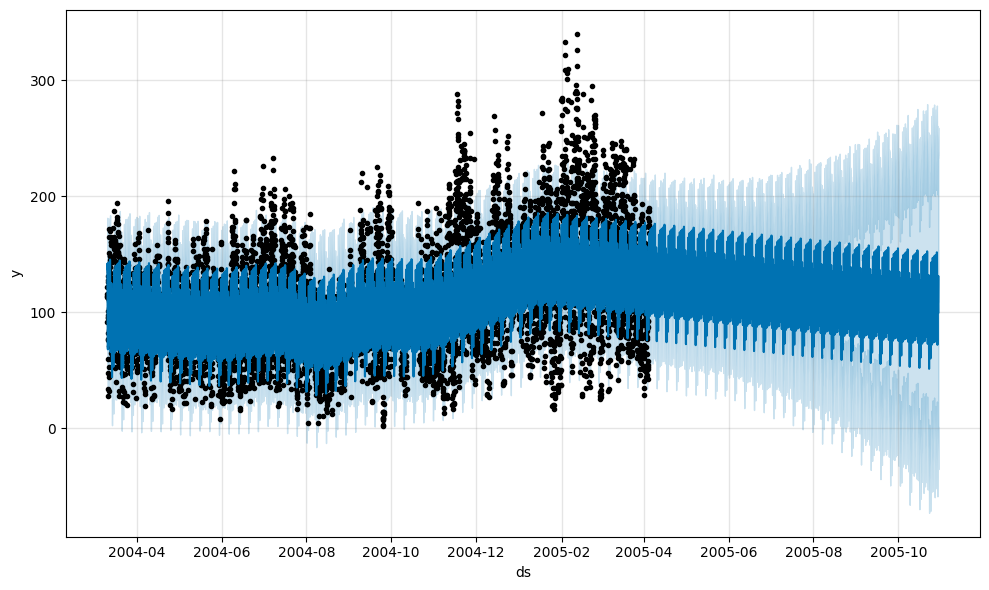

In [50]:
fig1=model.plot(forecast)

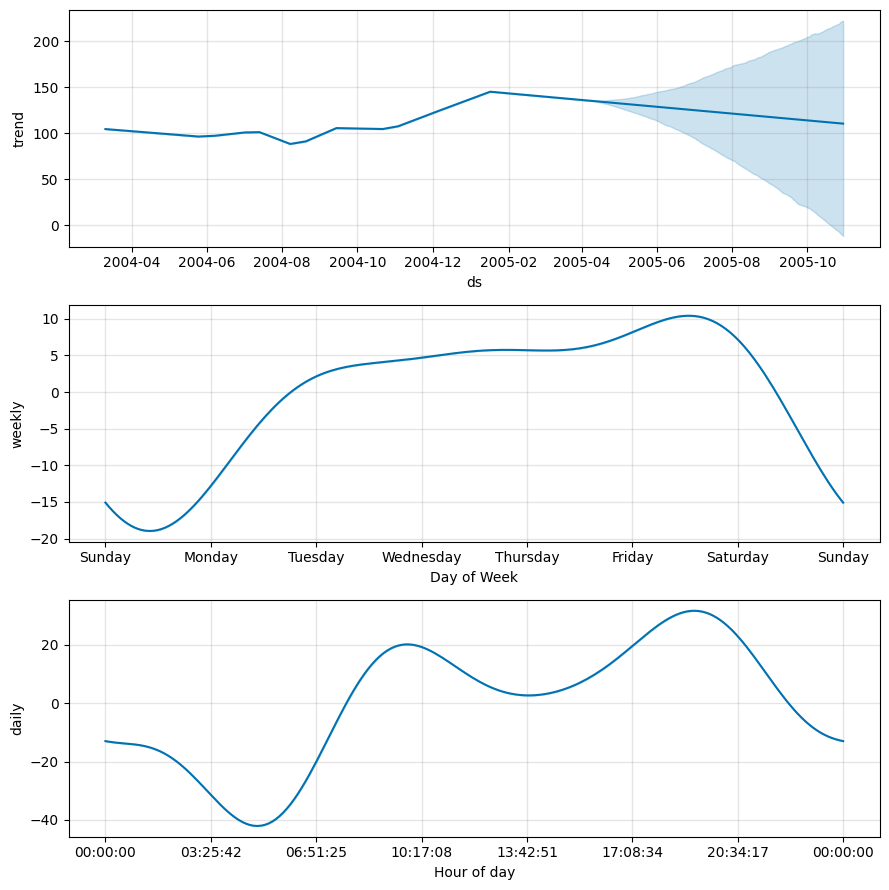

In [132]:
fig2 = model.plot_components(forecast)